# Intuition for Gradient Descent

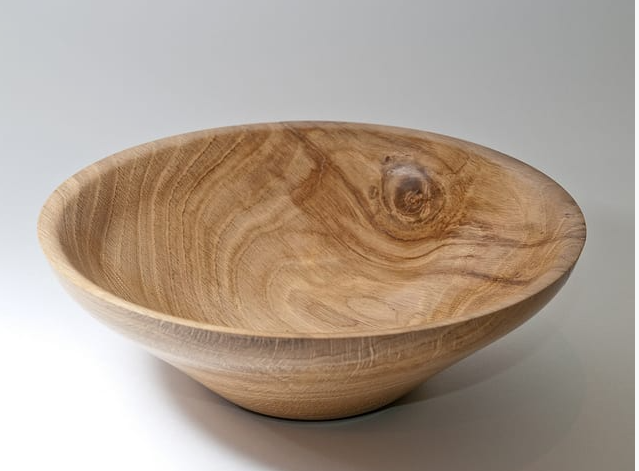

Think of a large bowl like what you would eat cereal out of or store fruit in. This bowl is a plot of the cost function (f).

- A random position on the surface of the bowl is the cost of the current values of the coefficients (cost).

- The bottom of the bowl is the cost of the best set of coefficients, the minimum of the function.

- The goal is to continue to try different values for the coefficients, evaluate their cost and select new coefficients that have a slightly better (lower) cost.

- Repeating this process enough times will lead to the bottom of the bowl and you will know the values of the coefficients that result in the minimum cost.

# What is a Gradient ? 

Intuitively it is a slope of a curve at a given point in a specified direction.

In the case of a **univariate function**, it is simply the **first derivative at a selected point**. In the case of a **multivariate function,** it is a **vector of derivatives** in each main direction (along variable axes). Because we are interested only in a slope along one axis and we don’t care about others these derivatives are called **partial derivatives.**

A gradient for an n-dimensional function f(x) at a given point p is defined as follows:

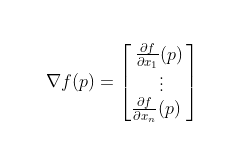

The upside-down triangle is a so-called nabla symbol and you read it “del”. To better understand how to calculate it let’s do a hand calculation for an exemplary 2-dimensional function below.

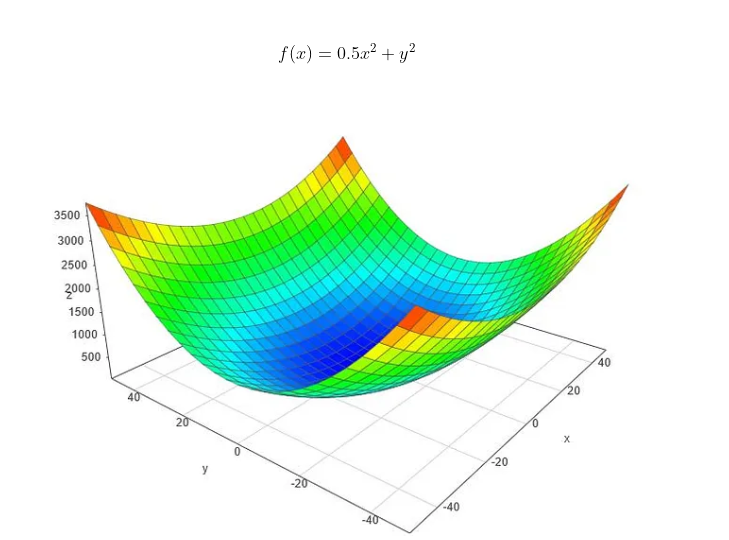

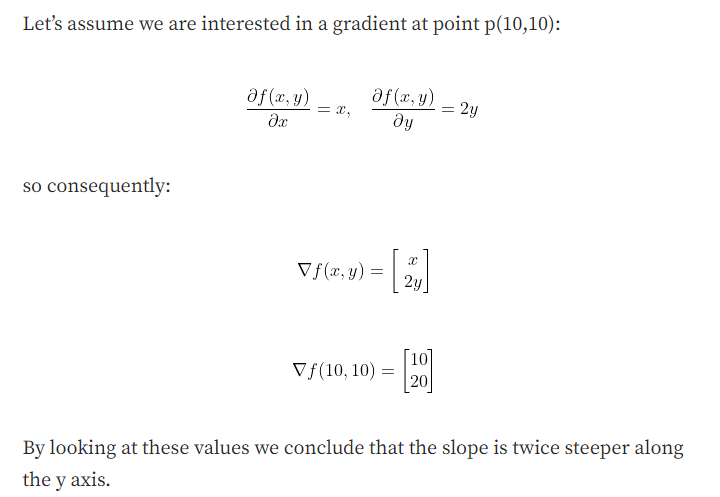

# Gradient Descent Algorithm

**Gradient Descent Algorithm** iteratively calculates the next point using gradient at the current position, scales it (by a learning rate) and subtracts obtained value from the current position (makes a step). It subtracts the value because we want to minimise the function (to maximise it would be adding).

This process can be written as:

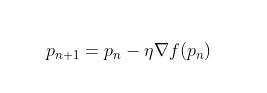

There’s an important parameter η which scales the gradient and thus controls the step size. In machine learning, it is called learning rate and have a strong influence on performance.

- The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point.

- If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.

In summary, Gradient Descent method’s steps are:

- choose a starting point (initialisation).

- calculate gradient at this point.

- make a scaled step in the opposite direction to the gradient (objective: minimise)

- repeat points 2 and 3 until one of the criteria is met:
    - maximum number of iterations reached
    - step size is smaller than the tolerance (due to scaling or a small gradient).


Below, there’s an exemplary implementation of the Gradient Descent algorithm (with steps tracking):

In [1]:
import numpy as np

def gradient_descent(start, gradient, learn_rate, max_iter, tol=0.01):
  steps = [start] # history tracking
  x = start

  for _ in range(max_iter):
    diff = learn_rate*gradient(x)
    if np.abs(diff)<tol:
      break    
    x = x - diff
    steps.append(x) # history tracing

  return steps, x

This function takes 5 parameters:

1. starting point - in our case, we define it manually but in practice, it is often a random initialisation

2. gradient function - has to be specified before-hand

3. learning rate - scaling factor for step sizes

4. maximum number of iterations

5. tolerance to conditionally stop the algorithm (in this case a default value is 0.01)

# Example 1 — a quadratic function

Let’s take a simple quadratic function defined as:

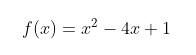

Because it is an univariate function a gradient function is:

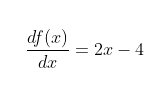

In [2]:
def func1(x):
  return x**2-4*x+1

def gradient_func1(x):
  return 2*x - 4

For this function, by taking a learning rate of 0.1 and starting point at x=9 we can easily calculate each step by hand. Let’s do it for the first 3 steps:

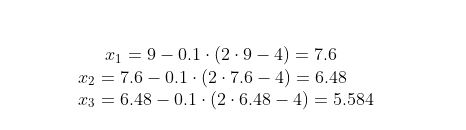

In [3]:
history, result = gradient_descent(9, gradient_func1, 0.1, 100)

In [6]:
import matplotlib.pyplot as plt

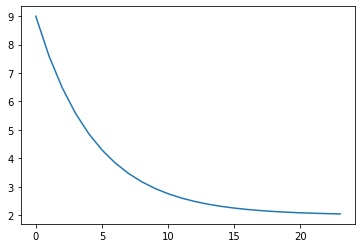

In [9]:
plt.plot(history)

In [10]:
result

2.041320706725109

In [11]:
history, result = gradient_descent(9, gradient_func1, 0.8, 100)

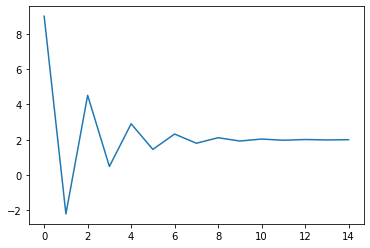

In [12]:
plt.plot(history)

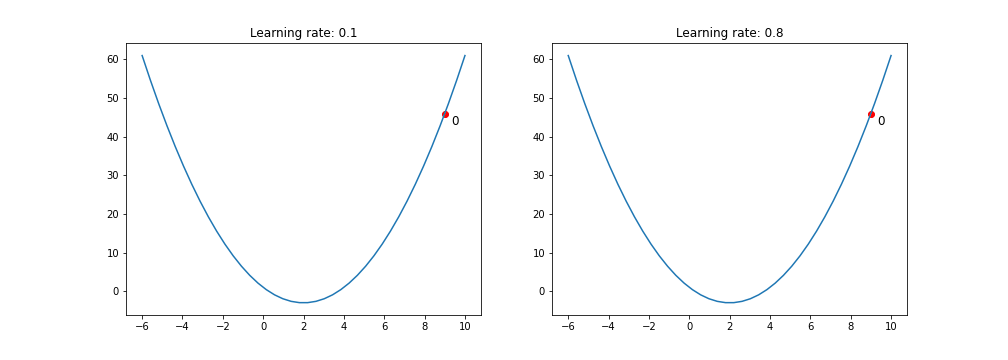

**_Saddle point is a critical point1 of a function which is neither a local minima or maxima._** 